In [6]:
from QuadTree import Point, QTNode, QuadTree
from KDTree import OrthagonalRange, KDTree, KDTNode
from test_gen import file_to_points
from time import perf_counter
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
def list_tuples_to_points(points):
    arr = []
    for point in points:
        arr.append(Point(point[0], point[1]))
    return arr

def list_points_to_tuples(points):
    arr = []
    for point in points:
        arr.append((point.x, point.y))
    return arr

In [2]:
linear = file_to_points('test_collections\\linear.json')
square = file_to_points('test_collections\\square.json')
square_diagonal = file_to_points('test_collections\\square_diagonal.json')
random_1e2 = file_to_points('test_collections\\random_1e2.json')
random_1e3 = file_to_points('test_collections\\random_1e3.json')
random_1e4 = file_to_points('test_collections\\random_1e4.json')
random_1e5 = file_to_points('test_collections\\random_1e5.json')
random_1e6 = file_to_points('test_collections\\random_1e6.json')
linear_100_10         = file_to_points('test_collections\\linear_100_10.json')
linear_1000_10        = file_to_points('test_collections\\linear_1000_10.json')
linear_10000_10       = file_to_points('test_collections\\linear_10000_10.json')
square_diagonal_100   = file_to_points('test_collections\\square_diagonal_100.json')
square_diagonal_1000  = file_to_points('test_collections\\square_diagonal_1000.json')
square_diagonal_10000 = file_to_points('test_collections\\square_diagonal_10000.json')

NameError: name 'file_to_points' is not defined

In [45]:
collections = [square,
               linear, linear_100_10, linear_1000_10, linear_10000_10,
               square_diagonal, square_diagonal_100, square_diagonal_1000, square_diagonal_10000,
               random_1e2, random_1e3, random_1e4, random_1e5, random_1e6]
QT_time_build = []
QT_time_find = []
KDT_time_build = []
KDT_time_find = []

for idx, coll in enumerate(collections):
    print(f'{idx}. start QUADTREE', end = "  ")
    pts = list_tuples_to_points(coll)
    
    print(f' build', end = "  ")
    time1 = perf_counter()
    QT = QuadTree(pts, 5)
    time2 = perf_counter()
    
    QT_time_build.append(time2-time1)
    
    print(f' find', end = "  ")
    time3 = perf_counter()
    found = QT.find_points(Point(0.0, 0.0), Point(100.0, 100.0))
    time4 = perf_counter()
    
    QT_time_find.append(time4-time3)
    
    print(f' end')
    
    print(f'{idx}. start KDTREE  ', end = "  ")
    print(f' build', end = "  ")
    time1 = perf_counter()
    KDT = KDTree(coll)
    time2 = perf_counter()
    
    KDT_time_build.append(time2-time1)
    
    print(f' find', end = "  ")
    time3 = perf_counter()
    found = KDT.search(OrthagonalRange(0.0, 100.0, 0.0, 100.0))
    time4 = perf_counter()
    
    KDT_time_find.append(time4-time3)
    
    print(f' end')
    
    
# print(QT_time_build)
# print(QT_time_find)
# print(KDT_time_build)
# print(KDT_time_find)



0. start QUADTREE  0. build  0. find  0. end
0. start KDTREE  0. build  0. find  0. end
1. start QUADTREE  1. build  1. find  1. end
1. start KDTREE  1. build  1. find  1. end
2. start QUADTREE  2. build  2. find  2. end
2. start KDTREE  2. build  2. find  2. end
3. start QUADTREE  3. build  3. find  3. end
3. start KDTREE  3. build  3. find  3. end
4. start QUADTREE  4. build  4. find  4. end
4. start KDTREE  4. build  4. find  4. end
5. start QUADTREE  5. build  5. find  5. end
5. start KDTREE  5. build  5. find  5. end
6. start QUADTREE  6. build  6. find  6. end
6. start KDTREE  6. build  6. find  6. end
7. start QUADTREE  7. build  7. find  7. end
7. start KDTREE  7. build  7. find  7. end
8. start QUADTREE  8. build  8. find  8. end
8. start KDTREE  8. build  8. find  8. end
9. start QUADTREE  9. build  9. find  9. end
9. start KDTREE  9. build  9. find  9. end
10. start QUADTREE  10. build  10. find  10. end
10. start KDTREE  10. build  10. find  10. end
11. start QUADTREE  11. 

In [63]:
# collections = [square,
#                linear, linear_100_10, linear_1000_10, linear_10000_10,
#                square_diagonal, square_diagonal_100, square_diagonal_1000, square_diagonal_10000,
#                random_1e2, random_1e3, random_1e4, random_1e5, random_1e6]

tab_random = {'collection': ["random_1e2", "random_1e3", "random_1e4", "random_1e5", "random_1e6"],
      'QT building time [s]': QT_time_build[9:], 'QT finding time [s]': QT_time_find[9:]}

tab_sq_diag = {'collection': ["square_diagonal", "square_diagonal_100", "square_diagonal_1000", "square_diagonal_10000"],
               'QT building time [s]': QT_time_build[5:9], 'QT finding time [s]': QT_time_find[5:9]}

tab_linear = {'collection': ["linear", "linear_100_10", "linear_1000_10", "linear_10000_10"],
             'QT building time [s]': QT_time_build[1:5], 'QT finding time [s]': QT_time_find[1:5]}

In [64]:
df_tab_random=pd.DataFrame(tab_random)
df_tab_sq_diag=pd.DataFrame(tab_sq_diag)
df_tab_linear=pd.DataFrame(tab_linear)

In [67]:
df_tab_random

,collection,QT building time [s],QT finding time [s]
0,random_1e2,0.023491,0.000121
1,random_1e3,0.004428,0.000016
2,random_1e4,0.073240,0.000125
3,random_1e5,0.911001,0.000338
4,random_1e6,16.071880,0.002261


In [68]:
df_tab_sq_diag

,collection,QT building time [s],QT finding time [s]
0,square_diagonal,0.000163,0.000021
1,square_diagonal_100,0.003120,0.000035
2,square_diagonal_1000,0.046266,0.000463
3,square_diagonal_10000,0.531926,0.002438


In [69]:
df_tab_linear

,collection,QT building time [s],QT finding time [s]
0,linear,0.000103,0.000005
1,linear_100_10,0.000079,0.000006
2,linear_1000_10,0.000065,0.000008
3,linear_10000_10,0.000085,0.000007


## Random_tests

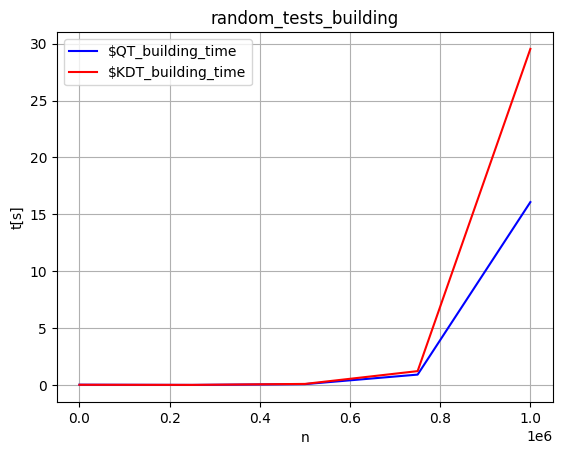

In [46]:
t1 = np.linspace(0,1e6,5)
x1 = np.asarray(QT_time_build[9:])
y1 = np.asarray(KDT_time_build[9:])

plt.plot(t1, x1, 'blue', label=r'$QT_building_time')
plt.plot(t1, y1, 'red', label=r'$KDT_building_time')
plt.legend(loc='best')
plt.xlabel('n')
plt.ylabel('t[s]')
plt.title('random_tests_building')
plt.grid()
plt.show()

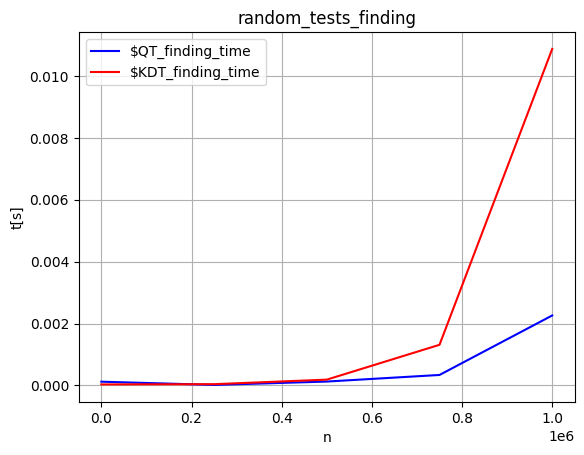

In [47]:
t2 = np.linspace(0,1e6,5)
x2 = np.asarray(QT_time_find[9:])
y2 = np.asarray(KDT_time_find[9:])

plt.plot(t2, x2, 'blue', label=r'$QT_finding_time')
plt.plot(t2, y2, 'red', label=r'$KDT_finding_time')
plt.legend(loc='best')
plt.xlabel('n')
plt.ylabel('t[s]')
plt.title('random_tests_finding')
plt.grid()
plt.show()

## Square_diagonal_tests

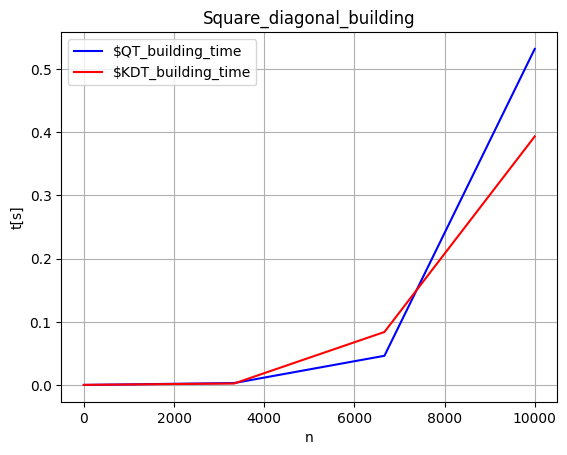

In [48]:
t3 = np.linspace(0, 10_000, 4)
x3 = np.asarray(QT_time_build[5:9])
y3 = np.asarray(KDT_time_build[5:9])

plt.plot(t3, x3, 'blue', label=r'$QT_building_time')
plt.plot(t3, y3, 'red', label=r'$KDT_building_time')
plt.legend(loc='best')
plt.xlabel('n')
plt.ylabel('t[s]')
plt.title('Square_diagonal_building')
plt.grid()
plt.show()

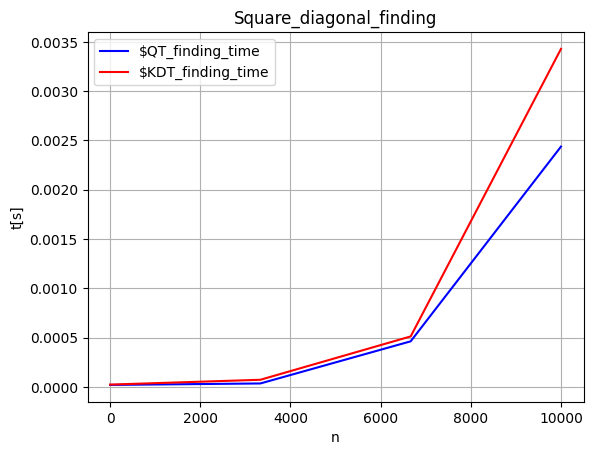

In [49]:
t3 = np.linspace(0, 10_000, 4)
x3 = np.asarray(QT_time_find[5:9])
y3 = np.asarray(KDT_time_find[5:9])

plt.plot(t3, x3, 'blue', label=r'$QT_finding_time')
plt.plot(t3, y3, 'red', label=r'$KDT_finding_time')
plt.legend(loc='best')
plt.xlabel('n')
plt.ylabel('t[s]')
plt.title('Square_diagonal_finding')
plt.grid()
plt.show()

## Linear_tests

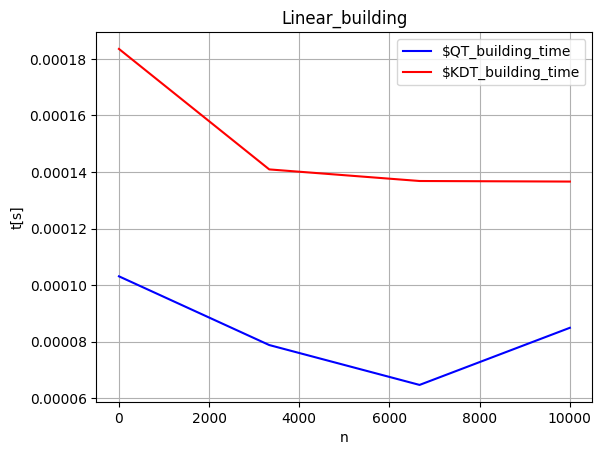

In [51]:
t3 = np.linspace(0, 10_000, 4)
x3 = np.asarray(QT_time_build[1:5])
y3 = np.asarray(KDT_time_build[1:5])

plt.plot(t3, x3, 'blue', label=r'$QT_building_time')
plt.plot(t3, y3, 'red', label=r'$KDT_building_time')
plt.legend(loc='best')
plt.xlabel('n')
plt.ylabel('t[s]')
plt.title('Linear_building')
plt.grid()
plt.show()

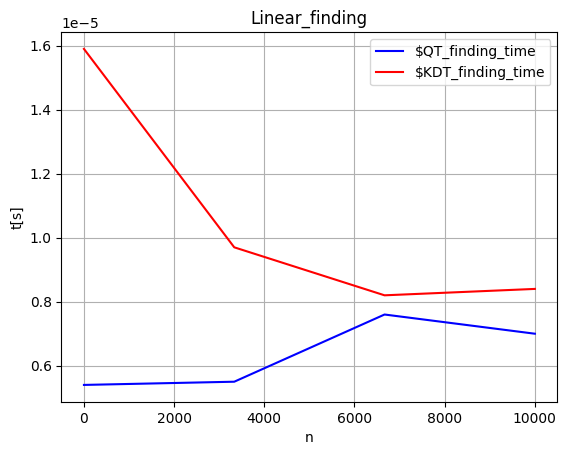

In [53]:
t3 = np.linspace(0, 10_000, 4)
x3 = np.asarray(QT_time_find[1:5])
y3 = np.asarray(KDT_time_find[1:5])

plt.plot(t3, x3, 'blue', label=r'$QT_finding_time')
plt.plot(t3, y3, 'red', label=r'$KDT_finding_time')
plt.legend(loc='best')
plt.xlabel('n')
plt.ylabel('t[s]')
plt.title('Linear_finding')
plt.grid()
plt.show()